The inverse of V
[[ 0.02545811 -0.00431973]
 [-0.00431973  0.04073297]]
The coordinates of the centre of the ellipse:
[2.23139091 2.06137759]
utV_1u
344.42034188495063
The normalized matrix P
[[ 0.9670626  -0.25453866]
 [ 0.25453866  0.9670626 ]]
The diagonalized matrix D
[[41.11652854  0.        ]
 [ 0.         23.88347146]]
a 1.8414284624658943
b 2.416096887079446


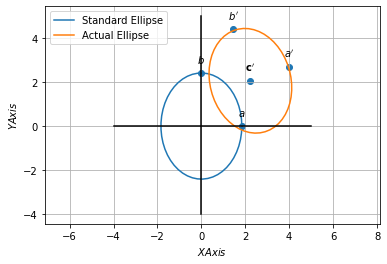

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA

def ellipse_gen(a,b,center):
    len = 50
    theta = np.linspace(0,2*np.pi,len)
    x_ellipse = np.zeros((2,len))
    x_ellipse[0,:] = a*np.cos(theta) + center[0]   
    x_ellipse[1,:] = b*np.sin(theta) + center[1]   
    return x_ellipse
 
#setting up plot
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
len = 100
y = np.linspace(-5,5,len)
 
#Ellipse parameters
V = np.array(([40,4.242],[4.242,25]))
u = np.array(([-98,-61]))
f = 205
print("The inverse of V")
print(np.linalg.inv(V))
#Computation
utV_1u = np.matmul(np.matmul(u.T,np.linalg.inv(V)),u)
c = -np.linalg.inv(V)@u
print("The coordinates of the centre of the ellipse:")
print(c)
print("utV_1u")
print(utV_1u)
#Eigenvalues and eigenvectors
D_vec,P = np.linalg.eig(V)
D = np.diag(D_vec)
a = np.sqrt((utV_1u-f)/D_vec[0])
b = np.sqrt((utV_1u-f)/D_vec[1])
xStandardEllipse = ellipse_gen(a,b,[0,0])
print("The normalized matrix P")
print(P)
print("The diagonalized matrix D")
print(D)
print("a",(a))
print("b",(b))
#Major and Minor Axes
MajorStandard = np.array(([a,0]))
MinorStandard = np.array(([0,b]))
 
#Affine transform 
Cs = np.array([[c[0],c[1]] for i in range(50)]).T
xActualEllipse = P@xStandardEllipse + Cs # x = Py + c (Affine Transformation)
MajorActual = P@MajorStandard+c[0]
MinorActual = P@MinorStandard+c[1]
 
#Plotting the standard ellipse
plt.plot(xStandardEllipse[0,:],xStandardEllipse[1,:],label='Standard Ellipse')
 
#Plotting the actual ellipse
plt.plot(xActualEllipse[0,:],xActualEllipse[1,:],label='Actual Ellipse')
 
#Labeling the coordinates
tri_coords = np.vstack((MajorStandard,MinorStandard,MajorActual,MinorActual,c)).T
plt.scatter(tri_coords[0,:], tri_coords[1,:])
vert_labels = ['$a$','$b$','$a^{\prime}$','$b^{\prime}$','$\mathbf{c^\prime}$']
for i, txt in enumerate(vert_labels):
    plt.annotate(txt, # this is the text
                 (tri_coords[0,i], tri_coords[1,i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Axis Plots
x_ = np.linspace(-4,5,50)
y_ = np.linspace(-4,5,50)
y_1 = [0 for i in range(50)]          
x_1 = [0 for i in range(50)]          
plt.plot(x_, y_1, 'black')
plt.plot(x_1,y_, 'black')

plt.xlabel('$X Axis$')
plt.ylabel('$Y Axis$')
plt.legend(loc='best')
plt.grid() 
plt.axis('equal')
 
plt.show()